# Machine Learning (Final Project)

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

plt.style.use("seaborn-v0_8-whitegrid")

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Malware_subset.csv')

print(df.isnull().sum())

# Label Encoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['Label'])
df['Label'] = encoder.fit_transform(df['Label'])

#Remove duplicated data
df.duplicated().sum()
df = df.drop_duplicates()


# andle missing data
df.isna().sum()

np.isinf(df).sum().sum()

In [ ]:
# selected_features = [' Bwd Header Length', ' Fwd Header Length.1', ' Subflow Bwd Packets', ' min_seg_size_forward',
                    # ' Total Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Std', ' Bwd Packet Length Std',
                    # 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Std', 'Fwd Packets/s', ' Min Packet Length']
X = df.drop('Label', axis=1)
y = df["Label"]

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Adjust threshold if needed
X_reduced = selector.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# X_train  #imbalanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

,count
Label,
2,328582
10,328582
9,328582
0,328582
5,328582
3,328582
1,328582
4,328582
7,328582


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=100)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)


In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


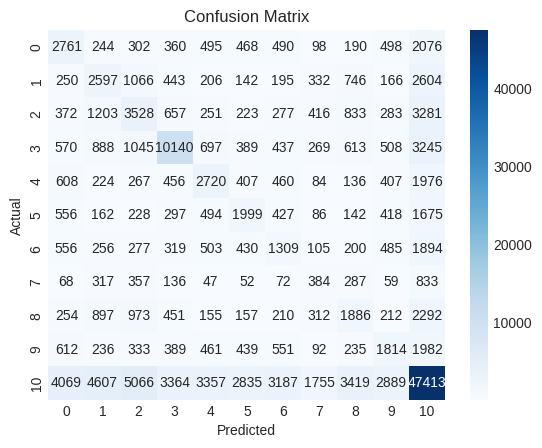

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


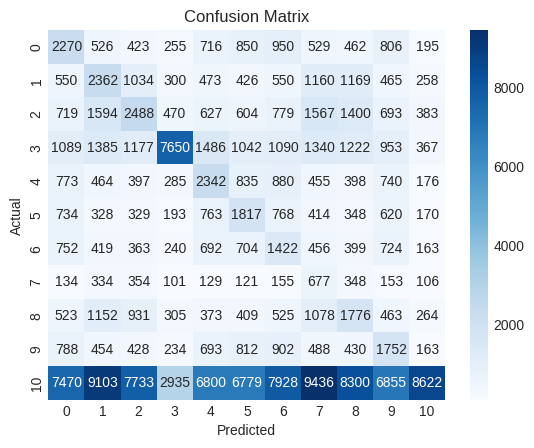

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average="weighted")  # or "micro", "weighted"
print("F1-Score:", f1)
f12 = f1_score(y_test, y_pred2, average="weighted")  # or "micro", "weighted"
print("F1-Score:", f12)


F1-Score: 0.4743522915699655
F1-Score: 0.21238061890427845
